In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data=pd.read_csv("CC GENERAL.csv")

In [2]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
data=data.drop("CUST_ID",axis=1)

In [6]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data) 

In [7]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

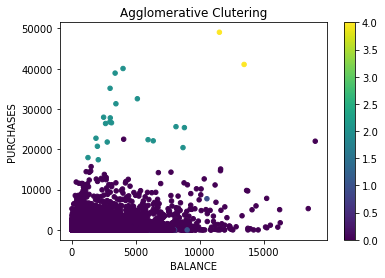

In [8]:
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=20)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

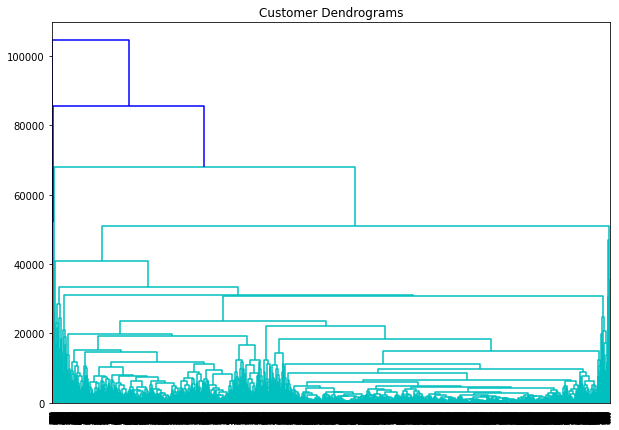

In [9]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [22]:
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [23]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [24]:
labels.value_counts()

0    6528
1    2291
2     131
dtype: int64

In [25]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[8.55769475e+02 8.54414576e-01 6.05531922e+02 3.13659959e+02
  2.92170383e+02 4.95105621e+02 4.67963752e-01 1.54297093e-01
  3.52621567e-01 1.06773224e-01 2.25298622e+00 1.06888208e+01
  2.75077612e+03 9.98866277e+02 5.85602363e+02 1.56964173e-01
  1.14336907e+01]
 [3.40057598e+03 9.40609772e-01 1.58230366e+03 9.88859314e+02
  5.93757125e+02 2.11788076e+03 5.39511439e-01 3.17349631e-01
  3.84691762e-01 2.10875737e-01 5.75054609e+00 2.21266929e+01
  9.01254021e+03 2.89153825e+03 1.56551247e+03 1.34183296e-01
  1.17374399e+01]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49776397e+03 3.33011382e-01
  1.18396947e+01]]


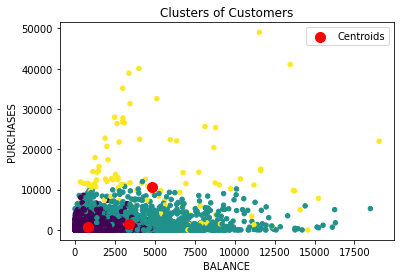

In [26]:
plt.scatter(data["BALANCE"],data["PURCHASES"],s=20,c=labels[:])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [27]:
from sklearn.decomposition import PCA
pca_t = PCA(2)
pca_t.fit(data)
pca_result = pca_t.transform(data)

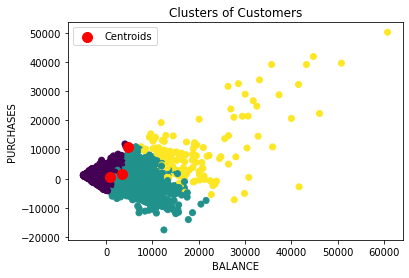

In [28]:
plt.scatter(pca_result[:,0],pca_result[:,1], c=labels[:] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [29]:
t = []
K = range(1,18)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(data)
    t.append(km.inertia_)

In [35]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

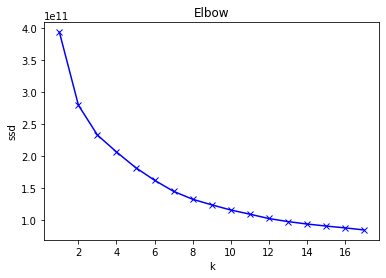

In [39]:
plt.plot(K,t,'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow')
plt.show()